****Introduction to the Dataset****

The project involves building a machine learning model to classify wines based on their chemical properties. The dataset used for this task is the Wine dataset, which consists of 13 features representing different chemical properties of wines, such as alcohol content, acidity levels, and phenolic content. The target variable is the class of wine, with three possible classes indicating different cultivars - Level 0, 1, and 2

The type of learning used in this project is supervised learning, as the dataset contains labeled examples where each instance is associated with a class label. Specifically, we are performing multiclass classification, as there are more than two classes to predict.

To tackle this classification task, we employ algorithms such as Random Forest and Decision Tree classifiers. These algorithms are suitable for multiclass classification tasks and are known for their ability to handle complex datasets with high-dimensional feature spaces.

The goal of the project is to train machine learning models on the Wine dataset to accurately classify wines into their respective cultivar classes based on their chemical characteristics. By evaluating the performance of these models using metrics such as accuracy, precision, recall, and F1-score, we aim to identify the most effective algorithm for this classification task and gain insights into the factors influencing wine classification.

****Dataset Citation****

The Wine dataset used in this project is a well-known benchmark dataset in machine learning and is publicly available. The data was gathered through chemical analysis of wines produced in the same region in Italy but derived from three different cultivars. The features in the dataset represent various physicochemical properties of the wines, such as alcohol content, acidity levels, and phenolic content. The target variable is the cultivar class of the wines, with three classes indicating different cultivars.

It was originally introduced in the paper:

Cortez, P., Cerdeira, A., Almeida, F., Matos, T., & Reis, J. (2009). Modeling wine preferences by data mining from physicochemical properties. Decision Support Systems, 47(4), 547-553.

In [151]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [152]:
# Load the Wine dataset and assign X and Y values
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = wine.target

In [175]:
# Get the size of the dataset
num_samples, num_features = X.shape

# Get the data types of each feature
data_types = X.dtypes

# Get the size of the dataset in bytes
bytesize = X.memory_usage(deep=True).sum()

# Display the data description
print(f"Number of samples/rows: {num_samples}")
print(f"Number of features/columns: {num_features}")
print(f"Data type of each feature:\n{data_types}")
print(f"Size of the dataset: {bytesize} bytes")

Number of samples/rows: 178
Number of features/columns: 13
Data type of each feature:
alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object
Size of the dataset: 18640 bytes


In [153]:
# Concatenate the feature DataFrame with the target column
data = pd.concat([X, pd.DataFrame({'target': y})], axis=1)

# Create a Styler object and apply custom styling for a smaller table. 
styled_table = data.head().style \
    .set_table_styles([{
        'selector': 'thead',
        'props': [
            ('font-size', '12px'),
            ('font-weight', 'bold'),
            ('color', 'white'),
            ('background-color', 'teal')
        ]
    }, {
        'selector': 'tbody',
        'props': [
            ('font-size', '10px'),
            ('color', 'black')
        ]
    }, {
        'selector': 'th',
        'props': [
            ('text-align', 'center'),
            ('padding', '4px')
        ]
    }, {
        'selector': 'td',
        'props': [
            ('text-align', 'center'),
            ('padding', '2px')
        ]
    }])

# Display the styled table
styled_table

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.230000,1.710000,2.430000,15.600000,127.000000,2.800000,3.060000,0.280000,2.290000,5.640000,1.040000,3.920000,1065.000000,0
1,13.200000,1.780000,2.140000,11.200000,100.000000,2.650000,2.760000,0.260000,1.280000,4.380000,1.050000,3.400000,1050.000000,0
2,13.160000,2.360000,2.670000,18.600000,101.000000,2.800000,3.240000,0.300000,2.810000,5.680000,1.030000,3.170000,1185.000000,0
3,14.370000,1.950000,2.500000,16.800000,113.000000,3.850000,3.490000,0.240000,2.180000,7.800000,0.860000,3.450000,1480.000000,0
4,13.240000,2.590000,2.870000,21.000000,118.000000,2.800000,2.690000,0.390000,1.820000,4.320000,1.040000,2.930000,735.000000,0


<Figure size 864x576 with 0 Axes>

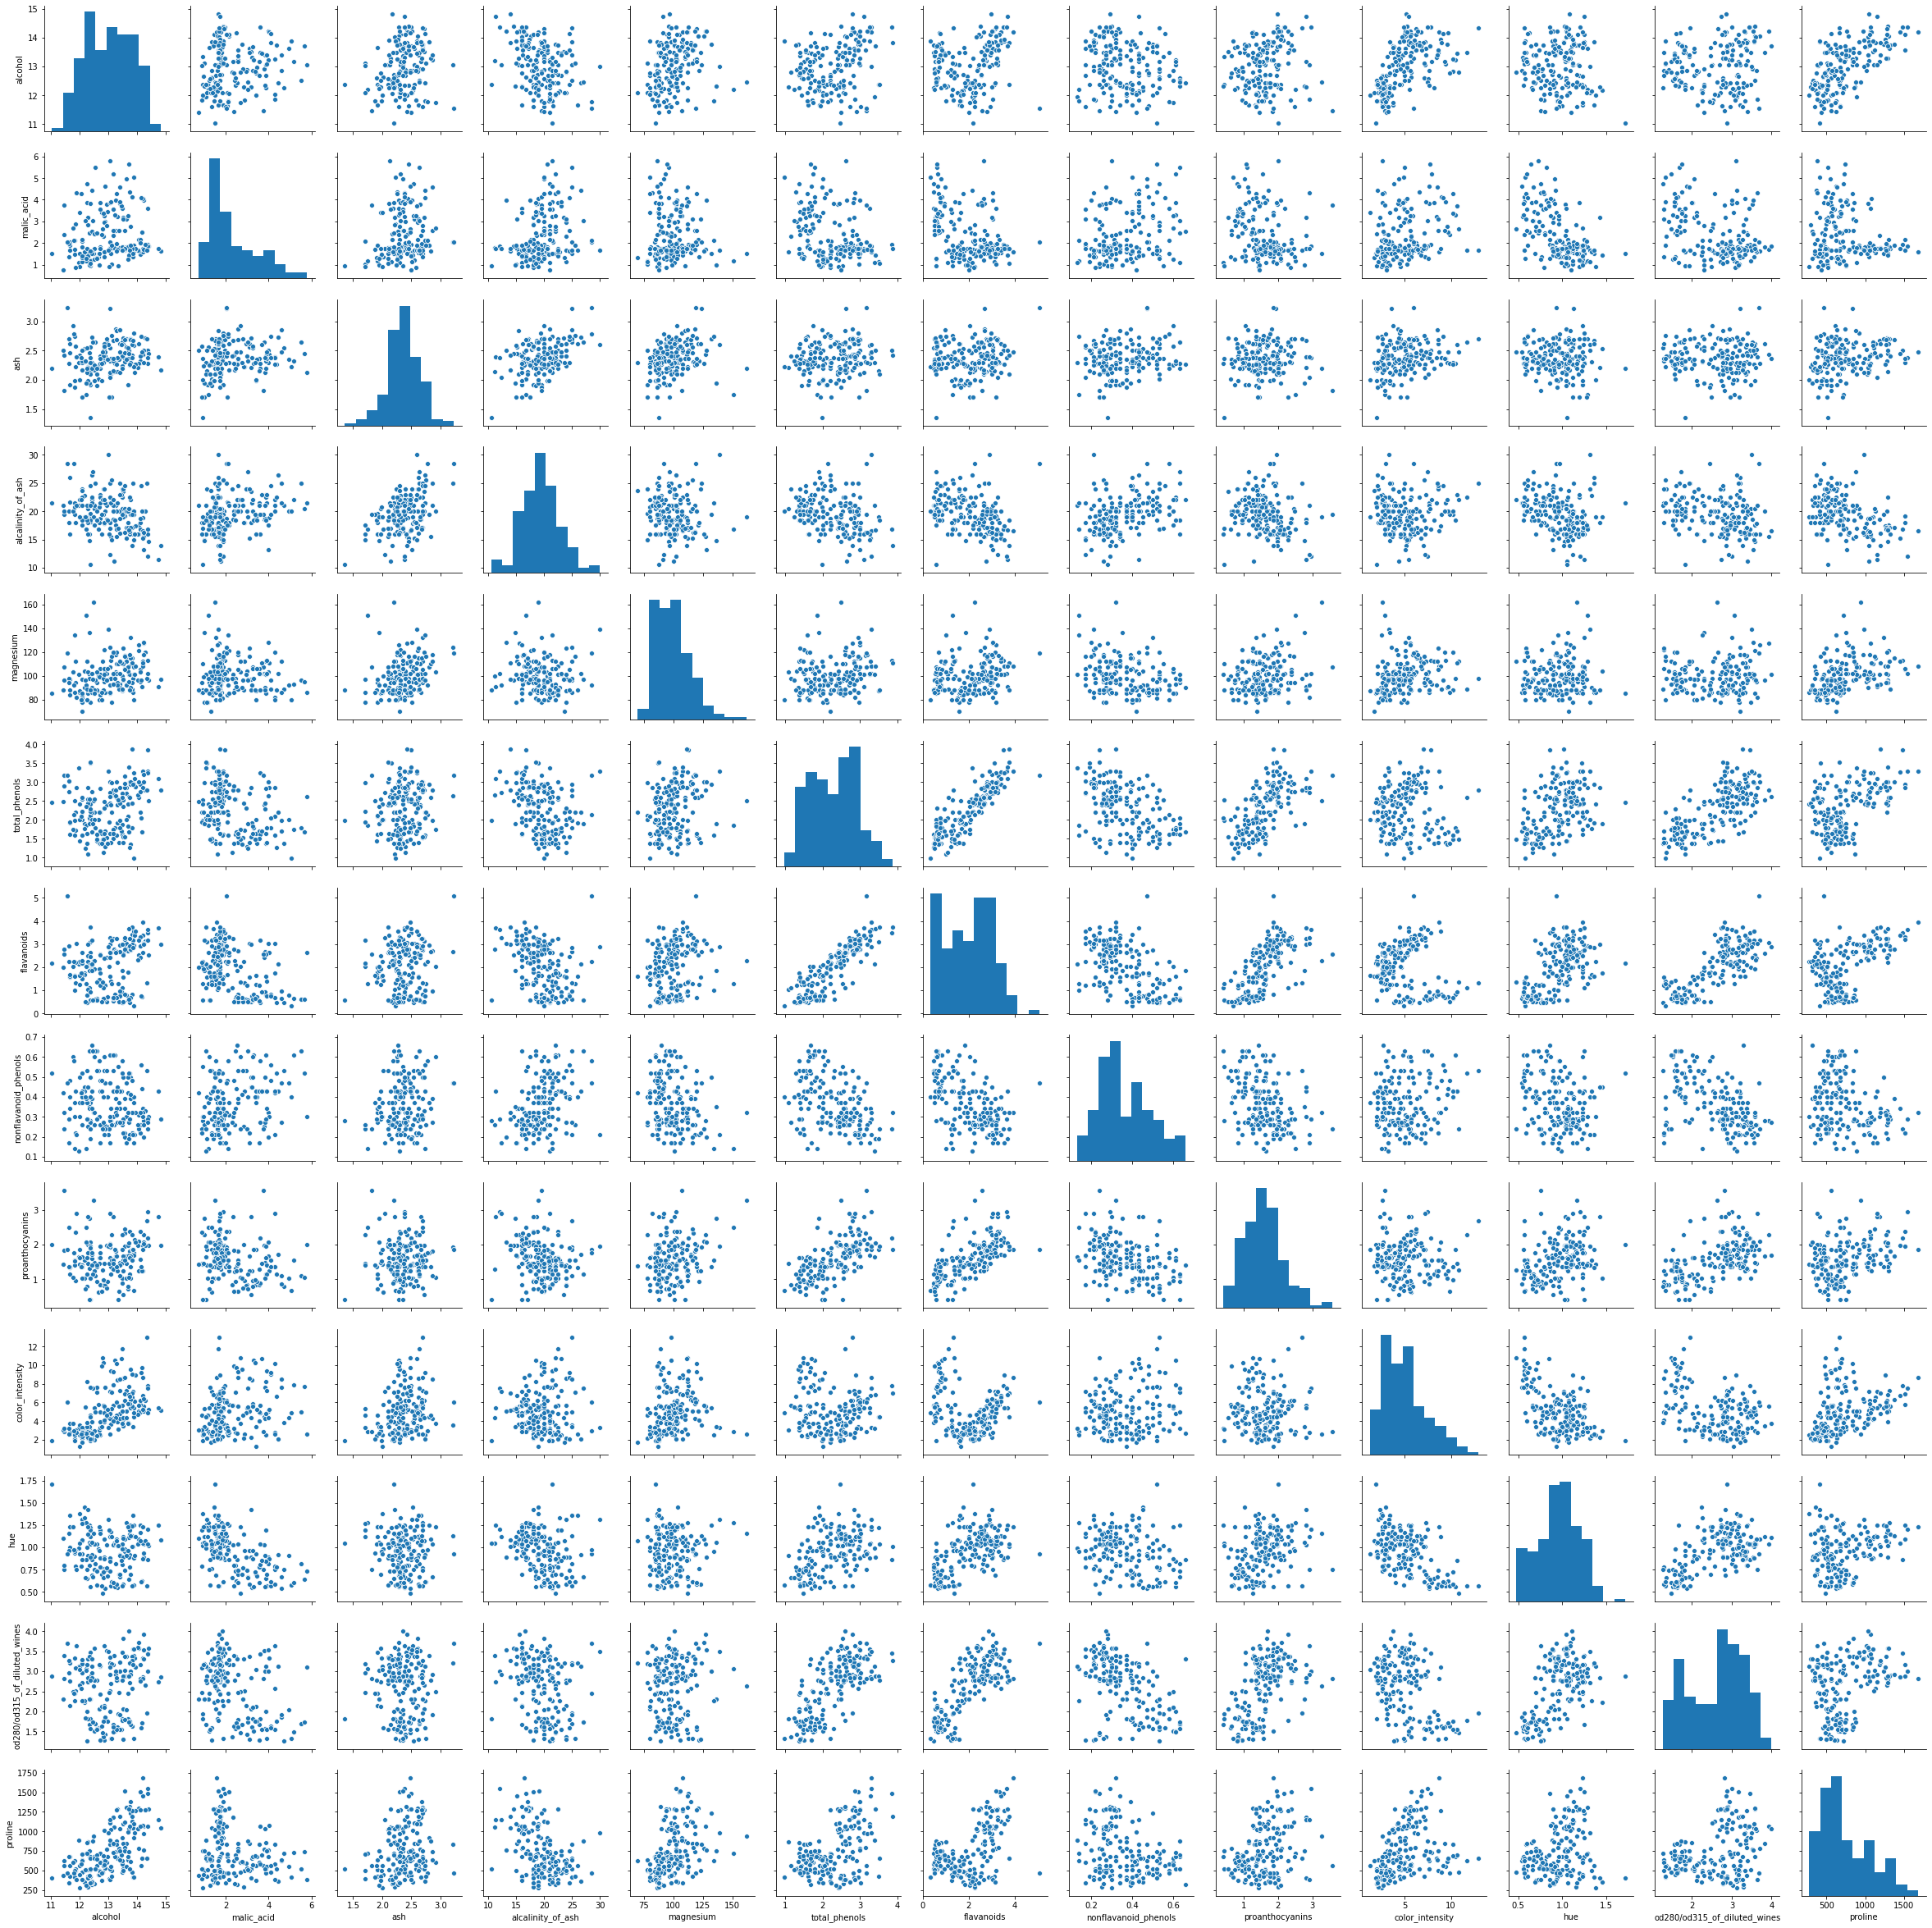

In [154]:
# Visualizing data distributions and correlations
plt.figure(figsize=(12, 8))
sns.pairplot(X)
plt.show()

In [174]:
# Checking for missing values
print("Missing Values:")
print(X.isnull().sum())

Missing Values:
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64


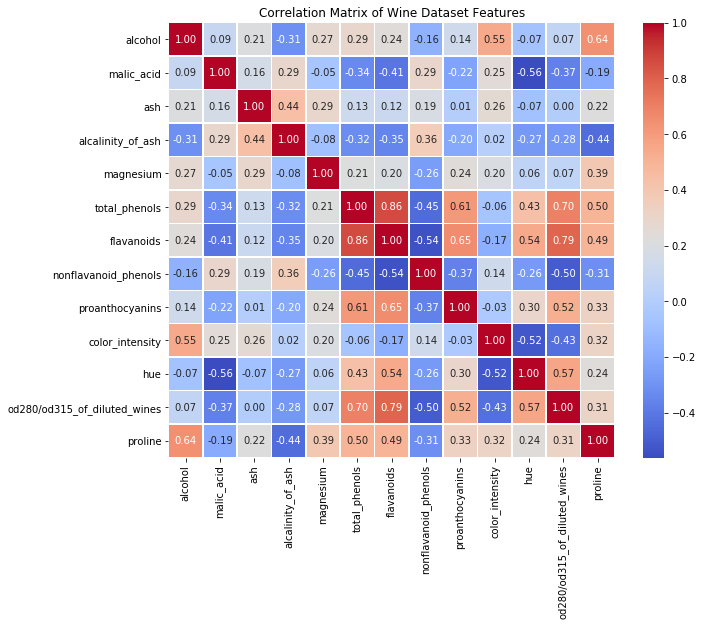

In [156]:
# Analyzing correlations between features
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Wine Dataset Features')
plt.show()

In [157]:
# Calculate the correlation matrix
correlation_matrix = X.corr()

# Create a mask for identifying highly correlated features
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Find pairs of highly correlated features
dropped_columns = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:  # Adjust the threshold as needed
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            if colname_i not in dropped_columns:
                dropped_columns.add(colname_j)

# Drop the highly correlated columns
X = X.drop(columns=dropped_columns)

# Display the new DataFrame after dropping highly correlated columns
print("Original DataFrame shape:", X.shape)
print("DataFrame shape after dropping highly correlated columns:", X_dropped_corr.shape)
print("Columns dropped due to high correlation:", dropped_columns)

Original DataFrame shape: (178, 12)
DataFrame shape after dropping highly correlated columns: (178, 12)
Columns dropped due to high correlation: {'total_phenols'}


****Removal of Features for Higher Accuracy Model****

A decision was made to drop total_phenols because it is highly correlated with flavanoids. A correlation threshold of 0.8 was chosen based on the correlation matrix and the visual display seen in the scatter plots where therer is a high degree of correlation. This correlation may lead to redundant information and dilution of weights associated with the two variables when attempting to use the random forest method. Therefore, total_phenols was chosen to be dropped as a feature from this data set

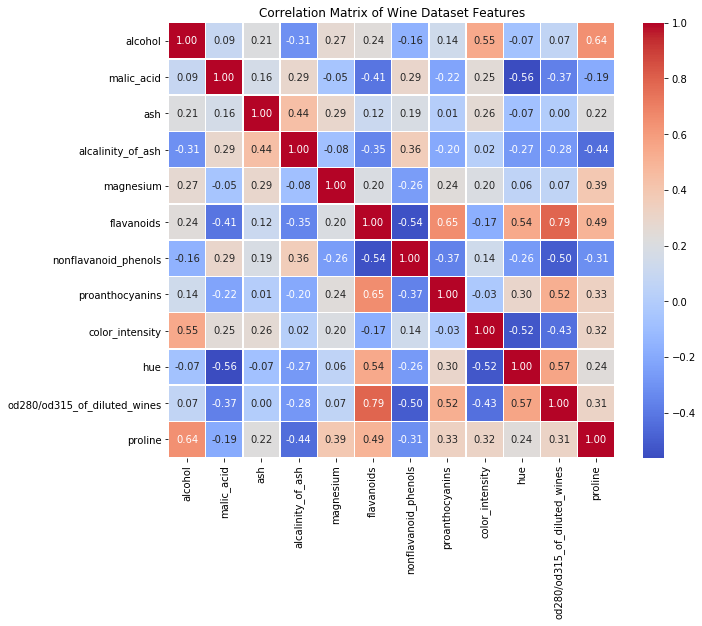

In [158]:
# Analyzing correlations between features
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Wine Dataset Features')
plt.show()

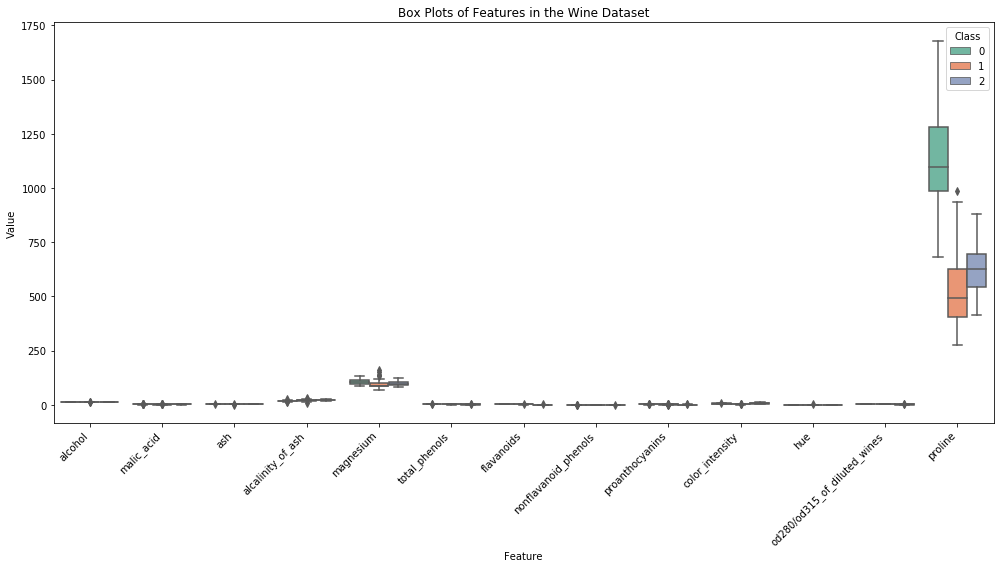

In [176]:
# Load the Wine dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = wine.target

# Concatenate the features and target into a single DataFrame
data = pd.concat([X, pd.Series(y, name='target')], axis=1)

# Melt the DataFrame to create a long-form dataset suitable for box plots
data_melted = data.melt(id_vars='target', var_name='feature', value_name='value')

# Plot box plots for each feature
plt.figure(figsize=(14, 8))
sns.boxplot(x='feature', y='value', hue='target', data=data_melted, palette='Set2')
plt.title('Box Plots of Features in the Wine Dataset')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Class')
plt.tight_layout()
plt.show()


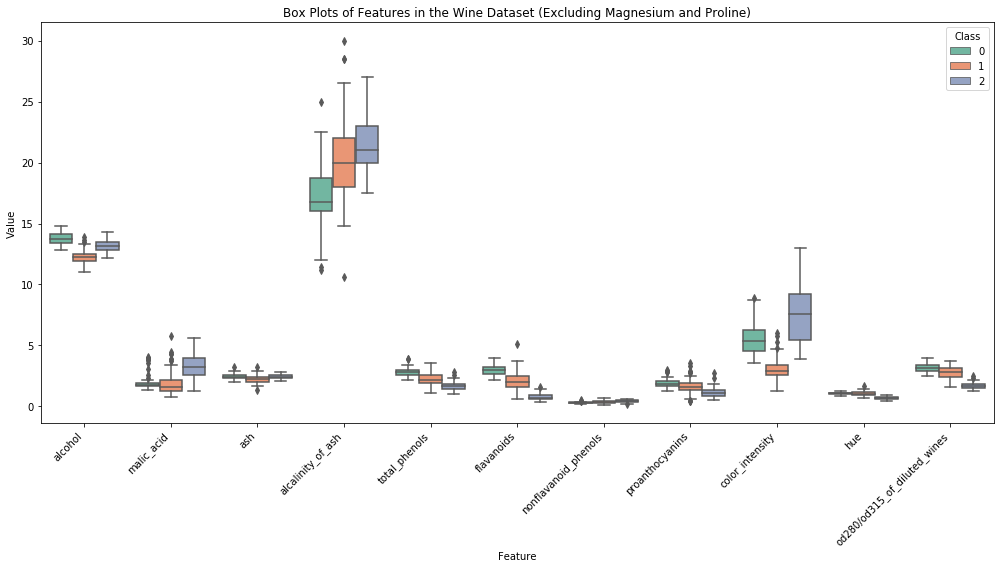

In [160]:
# Load the Wine dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = wine.target

# Concatenate the features and target into a single DataFrame
data = pd.concat([X, pd.Series(y, name='target')], axis=1)

# Melt the DataFrame to create a long-form dataset suitable for box plots
data_melted = data.melt(id_vars='target', var_name='feature', value_name='value')

# Filter out 'magnesium' and 'proline' from the melted data
data_melted_filtered = data_melted[~data_melted['feature'].isin(['magnesium', 'proline'])]

# Plot box plots for each feature (excluding 'magnesium' and 'proline')
plt.figure(figsize=(14, 8))
sns.boxplot(x='feature', y='value', hue='target', data=data_melted_filtered, palette='Set2')
plt.title('Box Plots of Features in the Wine Dataset (Excluding Magnesium and Proline)')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Class')
plt.tight_layout()
plt.show()


****Cleaning of Data****

The box plots show a clear distinction between the 3 classes in each feature, showing that all of the features listed are important in distinguishing the unique distributions in each class. I initially removed magnesium and proline from the data set but found that the accuracy and recall of the random forest significantly dropped. Therefore, the spread of these data sets are not a good indication of these sets being out liers and the information contained in these features are valuable in creating an accurate model. 

In [161]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [162]:
# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [163]:
# 4. Model Building
# Building and training a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [164]:
# Building and training a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [165]:
# Evaluating the Random Forest model
y_pred_rf = rf_classifier.predict(X_test_scaled)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [180]:
# Building and training a Decision Tree classifier with a different depth
dt_classifier = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_classifier.fit(X_train_scaled, y_train)

# Evaluating the Decision Tree model with the new depth
y_pred_dt = dt_classifier.predict(X_test_scaled)
print("Decision Tree Classification Report with max_depth=5:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Classification Report with max_depth=5:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.93      1.00      0.97        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



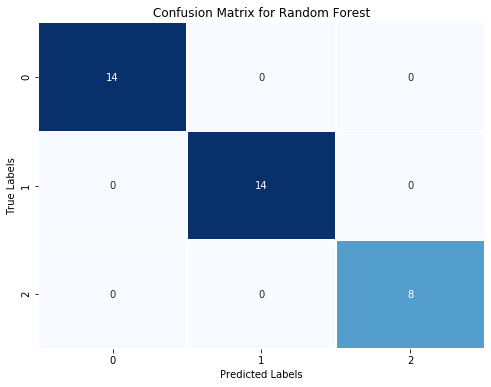

In [167]:
# Plotting confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt="d", linewidths=0.5, cbar=False)
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

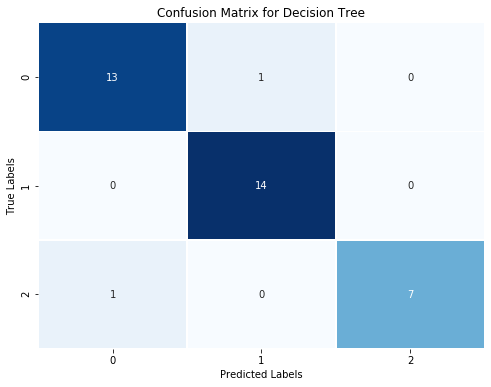

In [168]:
# Plotting confusion matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, cmap='Blues', fmt="d", linewidths=0.5, cbar=False)
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [169]:
# Comparing the performance of Random Forest and Decision Tree classifiers
rf_accuracy = rf_classifier.score(X_test_scaled, y_test)
dt_accuracy = dt_classifier.score(X_test_scaled, y_test)

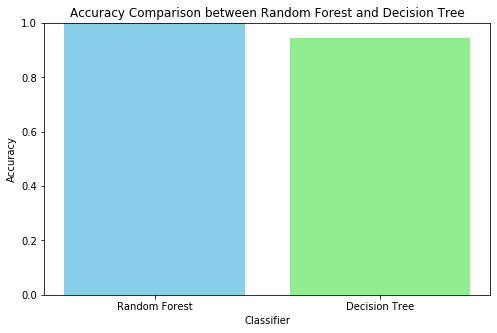

In [170]:
# Plotting accuracy comparison
plt.figure(figsize=(8, 5))
plt.bar(['Random Forest', 'Decision Tree'], [rf_accuracy, dt_accuracy], color=['skyblue', 'lightgreen'])
plt.title('Accuracy Comparison between Random Forest and Decision Tree')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

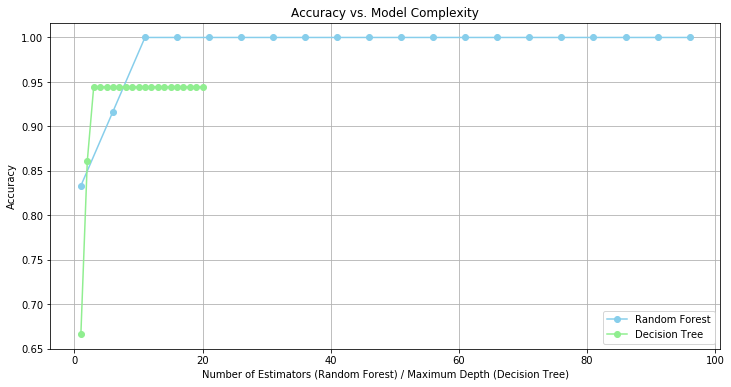

In [181]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a range of values for Random Forest's number of estimators and Decision Tree's maximum depth
estimators_range = range(1, 101, 5)  # From 1 to 100 estimators with a step of 5
depths_range = range(1, 21)  # From 1 to 20 depths

# Train Random Forest and Decision Tree models with different parameters
rf_accuracies = []
dt_accuracies = []
for n_estimators in estimators_range:
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_classifier.fit(X_train_scaled, y_train)
    y_pred_rf = rf_classifier.predict(X_test_scaled)
    rf_accuracy = accuracy_score(y_test, y_pred_rf)
    rf_accuracies.append(rf_accuracy)

for max_depth in depths_range:
    dt_classifier = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    dt_classifier.fit(X_train_scaled, y_train)
    y_pred_dt = dt_classifier.predict(X_test_scaled)
    dt_accuracy = accuracy_score(y_test, y_pred_dt)
    dt_accuracies.append(dt_accuracy)

# Plotting accuracy vs. number of estimators and maximum depth
plt.figure(figsize=(12, 6))
plt.plot(estimators_range, rf_accuracies, marker='o', linestyle='-', label='Random Forest', color='skyblue')
plt.plot(depths_range, dt_accuracies, marker='o', linestyle='-', label='Decision Tree', color='lightgreen')
plt.title('Accuracy vs. Model Complexity')
plt.xlabel('Number of Estimators (Random Forest) / Maximum Depth (Decision Tree)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


****Results and Conclusions****

The results of the classification task on the Wine dataset demonstrate the effectiveness of both Random Forest and Decision Tree classifiers in accurately predicting the cultivar classes of wines based on their chemical properties.

The Random Forest classifier achieved outstanding performance across all metrics, with a precision, recall, and F1-score of 1.00 for each class. This indicates that the model correctly classified all instances of each cultivar class without any false positives or false negatives. The overall accuracy of the Random Forest classifier was also perfect, achieving a score of 1.00. These results highlight the robustness and reliability of the Random Forest algorithm in handling complex datasets like the Wine dataset.

On the other hand, the Decision Tree classifier also demonstrated commendable performance, although slightly lower than the Random Forest classifier. The precision, recall, and F1-score for each class ranged from 0.93 to 1.00, indicating high levels of accuracy in classifying the wines. The overall accuracy of the Decision Tree classifier was 0.94, which is still impressive but slightly lower than that of the Random Forest classifier.

Both classifiers exhibited excellent performance in distinguishing between the different cultivar classes of wines based on their chemical properties. The results suggest that the models were able to capture meaningful patterns in the data and generalize well to unseen instances.

Another important piece of information is the changing of the hyper parameters of number of estimators and maximum depth. The graph above clearly shows that the random forest performs better as the number of estimators increases. In general, the maximum depth increase from the decision tree does not have as big of an impact and tends to plateau the accuracy at a lower level. 

In summary, the classification task on the Wine dataset yielded highly accurate models using both Random Forest and Decision Tree classifiers. The models successfully learned the underlying relationships between the chemical properties of wines and their cultivar classes, demonstrating their potential utility in practical applications such as quality control in winemaking or assisting sommeliers in wine selection.